# Homework 3: Visualization, Correlation, and Linear Models

### The total score for this assignment will be 80 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 60 pt: Homework questions. 

In [36]:
MY_UNIQNAME = 'austinam'

In [1]:
worked_with = 'iviev', 'shruthis', 'dimac'

## 0. Download the data from: 

* [https://www.kaggle.com/datasnaek/youtube-new](https://www.kaggle.com/datasnaek/youtube-new)

YouTube provides a list of trending videos on it's site, determined by user interaction metrics such as likes, comments, and views. This dataset includes months of daily trending video across five different regions: the United States ("US"), Canada ("CA"), Great Britain ("GB"), Germany ("DE"), and France ("FR").

* https://www.kaggle.com/abcsds/pokemon

"This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed."

## Part 1: Answer the questions below based on the *[YouTube dataset](https://www.kaggle.com/datasnaek/youtube-new)*
- Write Python code that can answer the following questions, and
- Explain your answers in plain English. 

### Q1. For 10 Points: Compare the distributions of comments, views, likes, and dislikes

* Plot histograms for these metrics *for the US*. What can you say about them?
* Try to apply a log transformation, and plot the histograms again. How do they look now?
* Create a pairplot *for the US*, as we did in this week's lab. Do you see anything interesting?
* Create additional pairplots for the other four regions. Do they look similar?

In [37]:
import numpy as np
import pandas as pd
%matplotlib inline
from pandas import Series
from pandas import DataFrame
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [38]:
us_data = pd.read_csv('data/USvideos.csv')
us_data['comments_plus1'] = us_data['comment_count'] + 1
us_data['likes_plus1'] = us_data['likes'] + 1
us_data['dislikes_plus1'] = us_data['dislikes'] + 1
us_data['comments_plus1_log'] = np.log(us_data['comments_plus1'])
us_data['likes_plus1_log'] = np.log(us_data['likes_plus1'])
us_data['dislikes_plus1_log'] = np.log(us_data['dislikes_plus1'])
us_data['views_log'] = np.log(us_data['views'])
us_data.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,ratings_disabled,video_error_or_removed,description,comments_plus1,likes_plus1,dislikes_plus1,comments_plus1_log,likes_plus1_log,dislikes_plus1_log,views_log
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,15955,57528,2967,9.677528,10.960027,7.995307,13.525658
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,False,False,"One year after the presidential election, John...",12704,97186,6147,9.449672,11.484382,8.723719,14.698775


In [39]:
us_data['comment_count'].describe()

count    4.094900e+04
mean     8.446804e+03
std      3.743049e+04
min      0.000000e+00
25%      6.140000e+02
50%      1.856000e+03
75%      5.755000e+03
max      1.361580e+06
Name: comment_count, dtype: float64

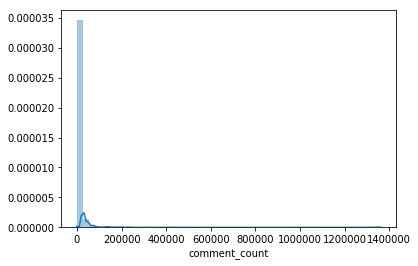

In [40]:
sns.distplot(us_data.comment_count)

In [41]:
us_data['views'].describe()

count    4.094900e+04
mean     2.360785e+06
std      7.394114e+06
min      5.490000e+02
25%      2.423290e+05
50%      6.818610e+05
75%      1.823157e+06
max      2.252119e+08
Name: views, dtype: float64

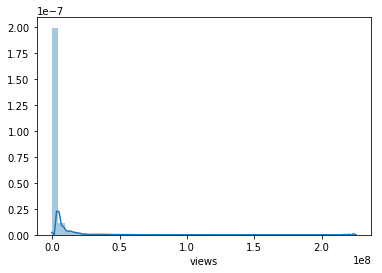

In [42]:
sns.distplot(us_data.views)

In [43]:
us_data['likes'].describe()

count    4.094900e+04
mean     7.426670e+04
std      2.288853e+05
min      0.000000e+00
25%      5.424000e+03
50%      1.809100e+04
75%      5.541700e+04
max      5.613827e+06
Name: likes, dtype: float64

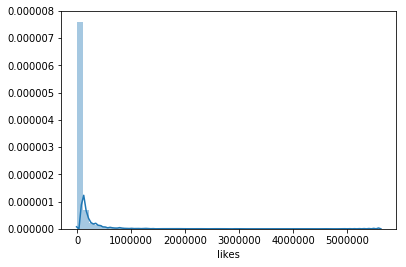

In [44]:
sns.distplot(us_data.likes)

In [45]:
us_data['dislikes'].describe()

count    4.094900e+04
mean     3.711401e+03
std      2.902971e+04
min      0.000000e+00
25%      2.020000e+02
50%      6.310000e+02
75%      1.938000e+03
max      1.674420e+06
Name: dislikes, dtype: float64

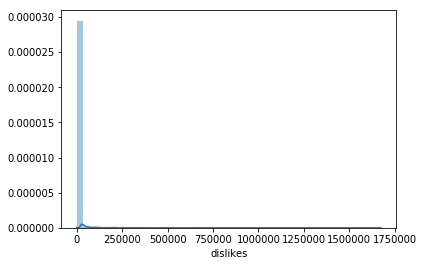

In [46]:
sns.distplot(us_data.dislikes)

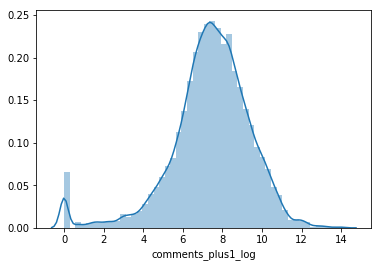

In [47]:
sns.distplot(us_data.comments_plus1_log)

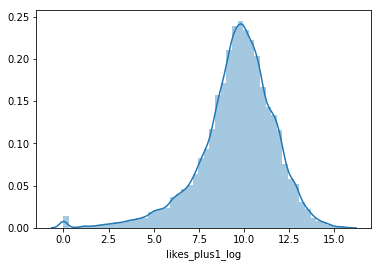

In [48]:
sns.distplot(us_data.likes_plus1_log)

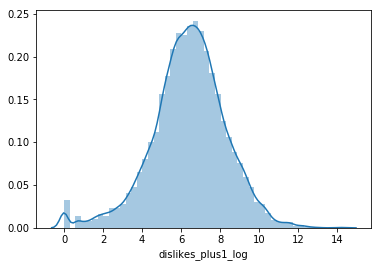

In [49]:
sns.distplot(us_data.dislikes_plus1_log)

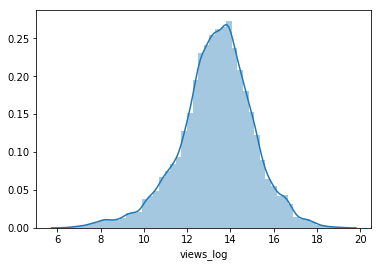

In [50]:
sns.distplot(us_data.views_log)

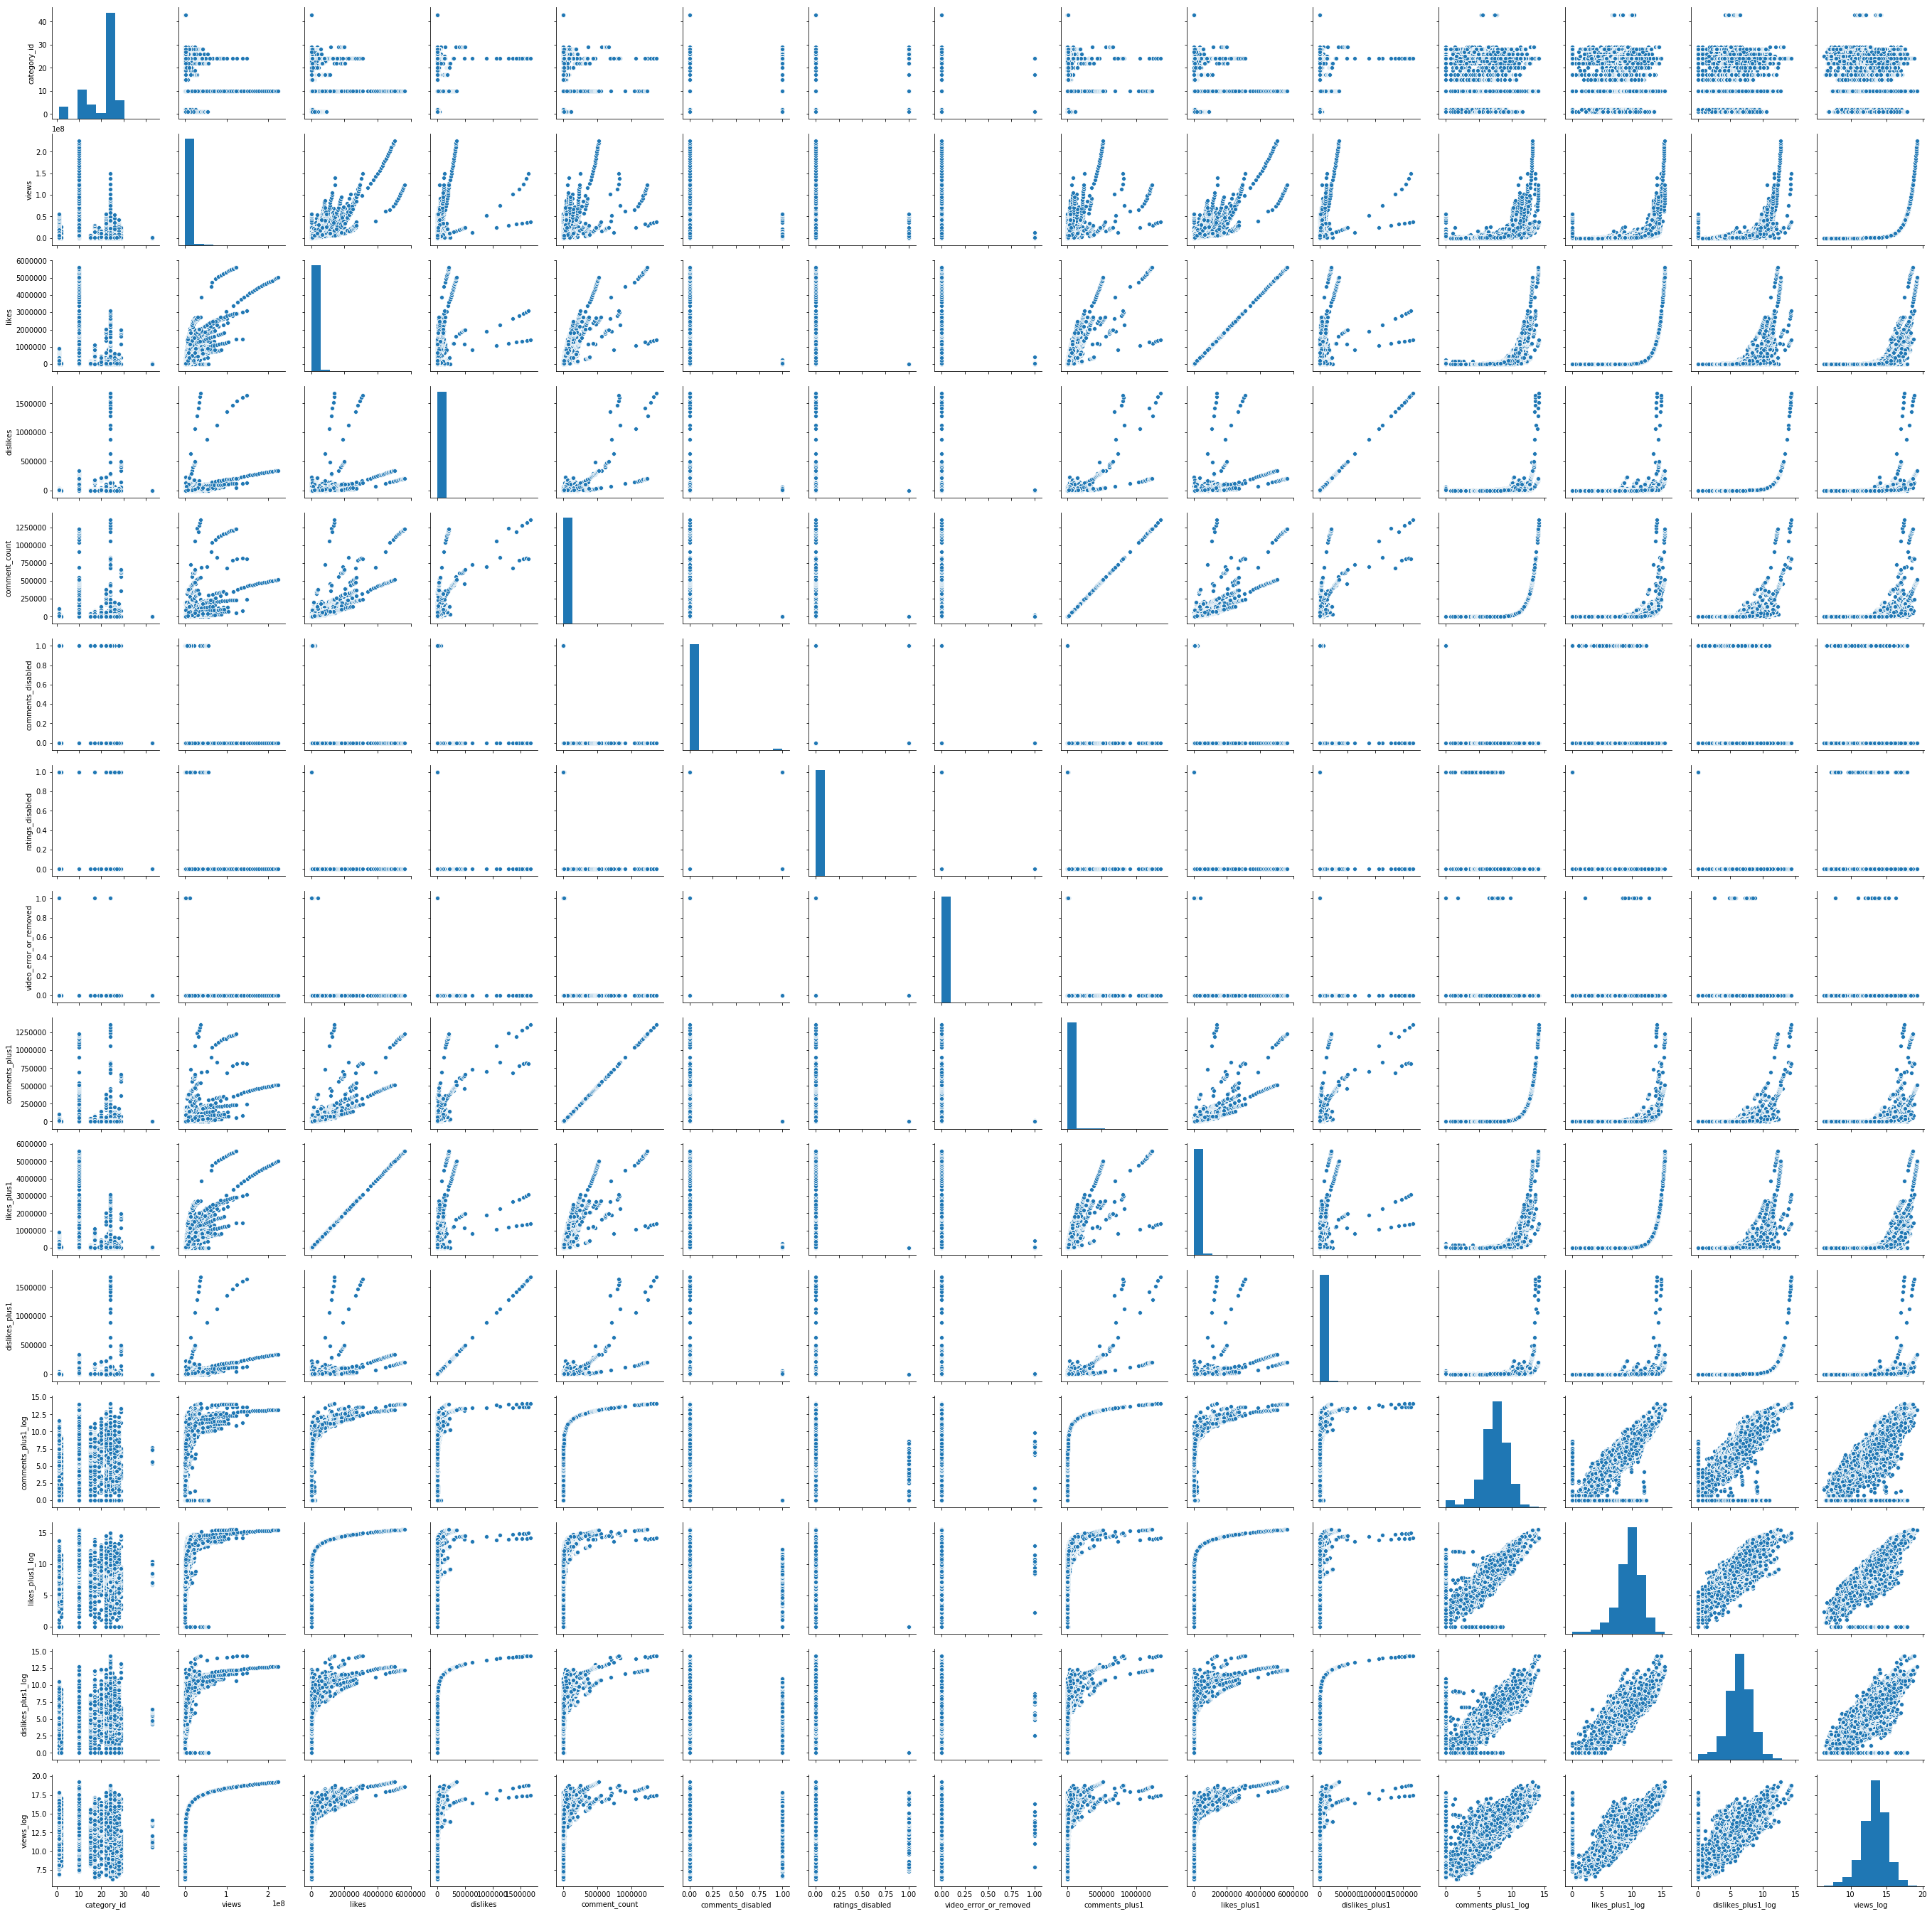

In [51]:
sns.pairplot(us_data)

In [52]:
ca_data = pd.read_csv('data/CAvideos.csv')
ca_data.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...


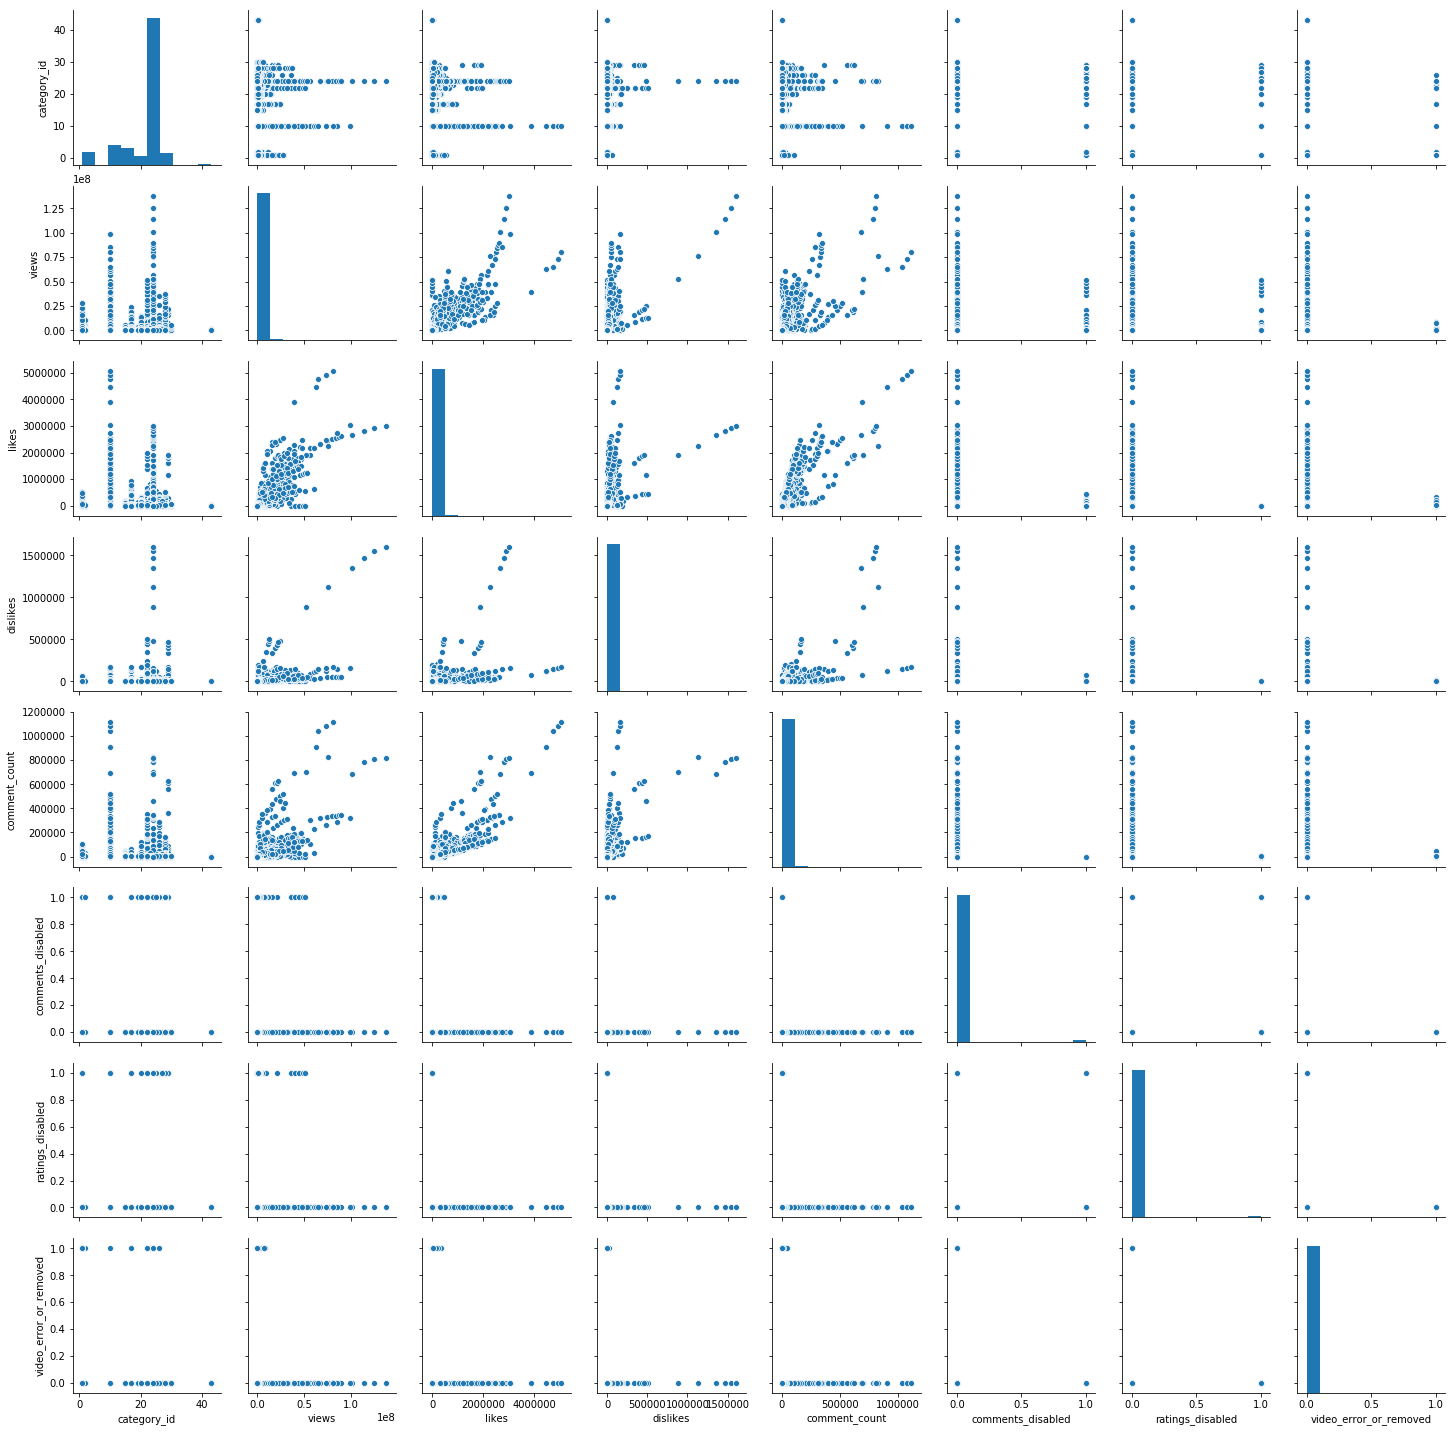

In [53]:
sns.pairplot(ca_data)

In [54]:
de_data = pd.read_csv('data/DEvideos.csv')
de_data.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...


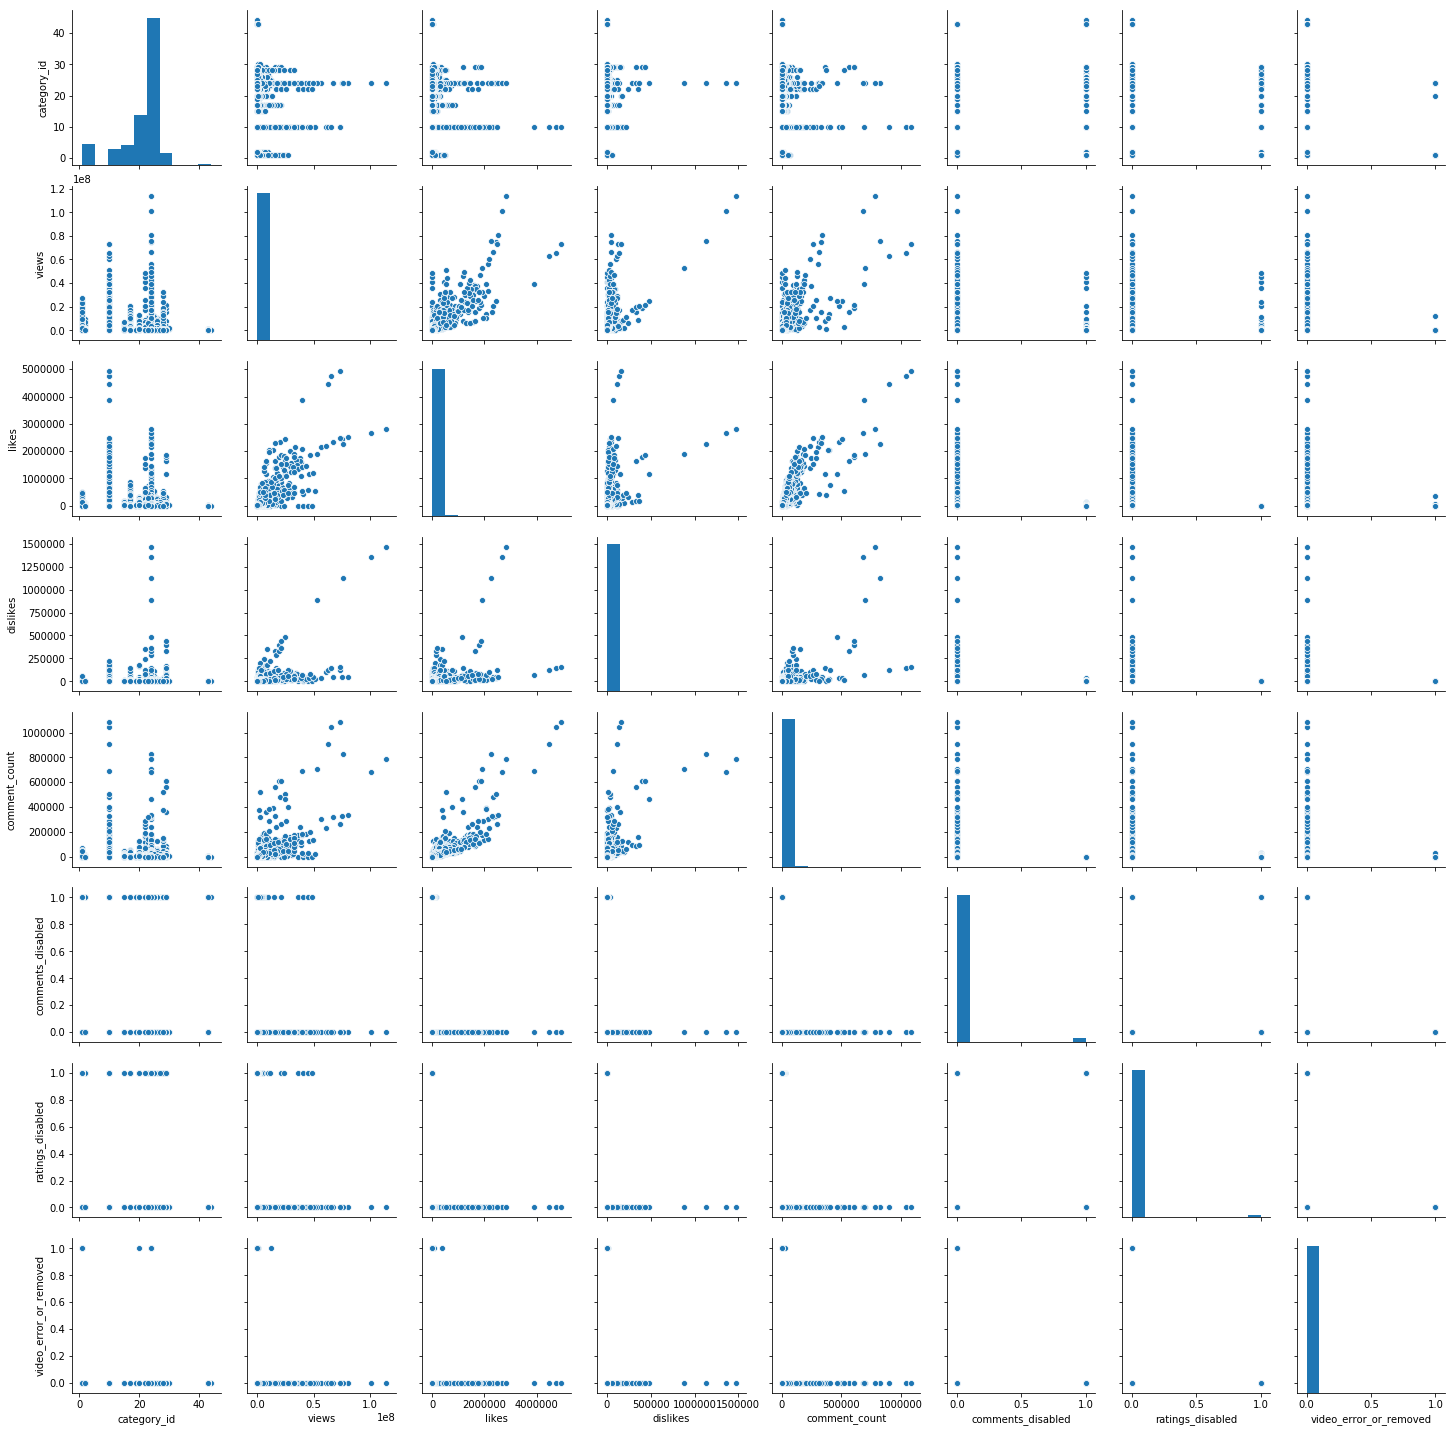

In [55]:
sns.pairplot(de_data)

In [58]:
fr_data = pd.read_csv('data/FRvideos.csv')
fr_data.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...


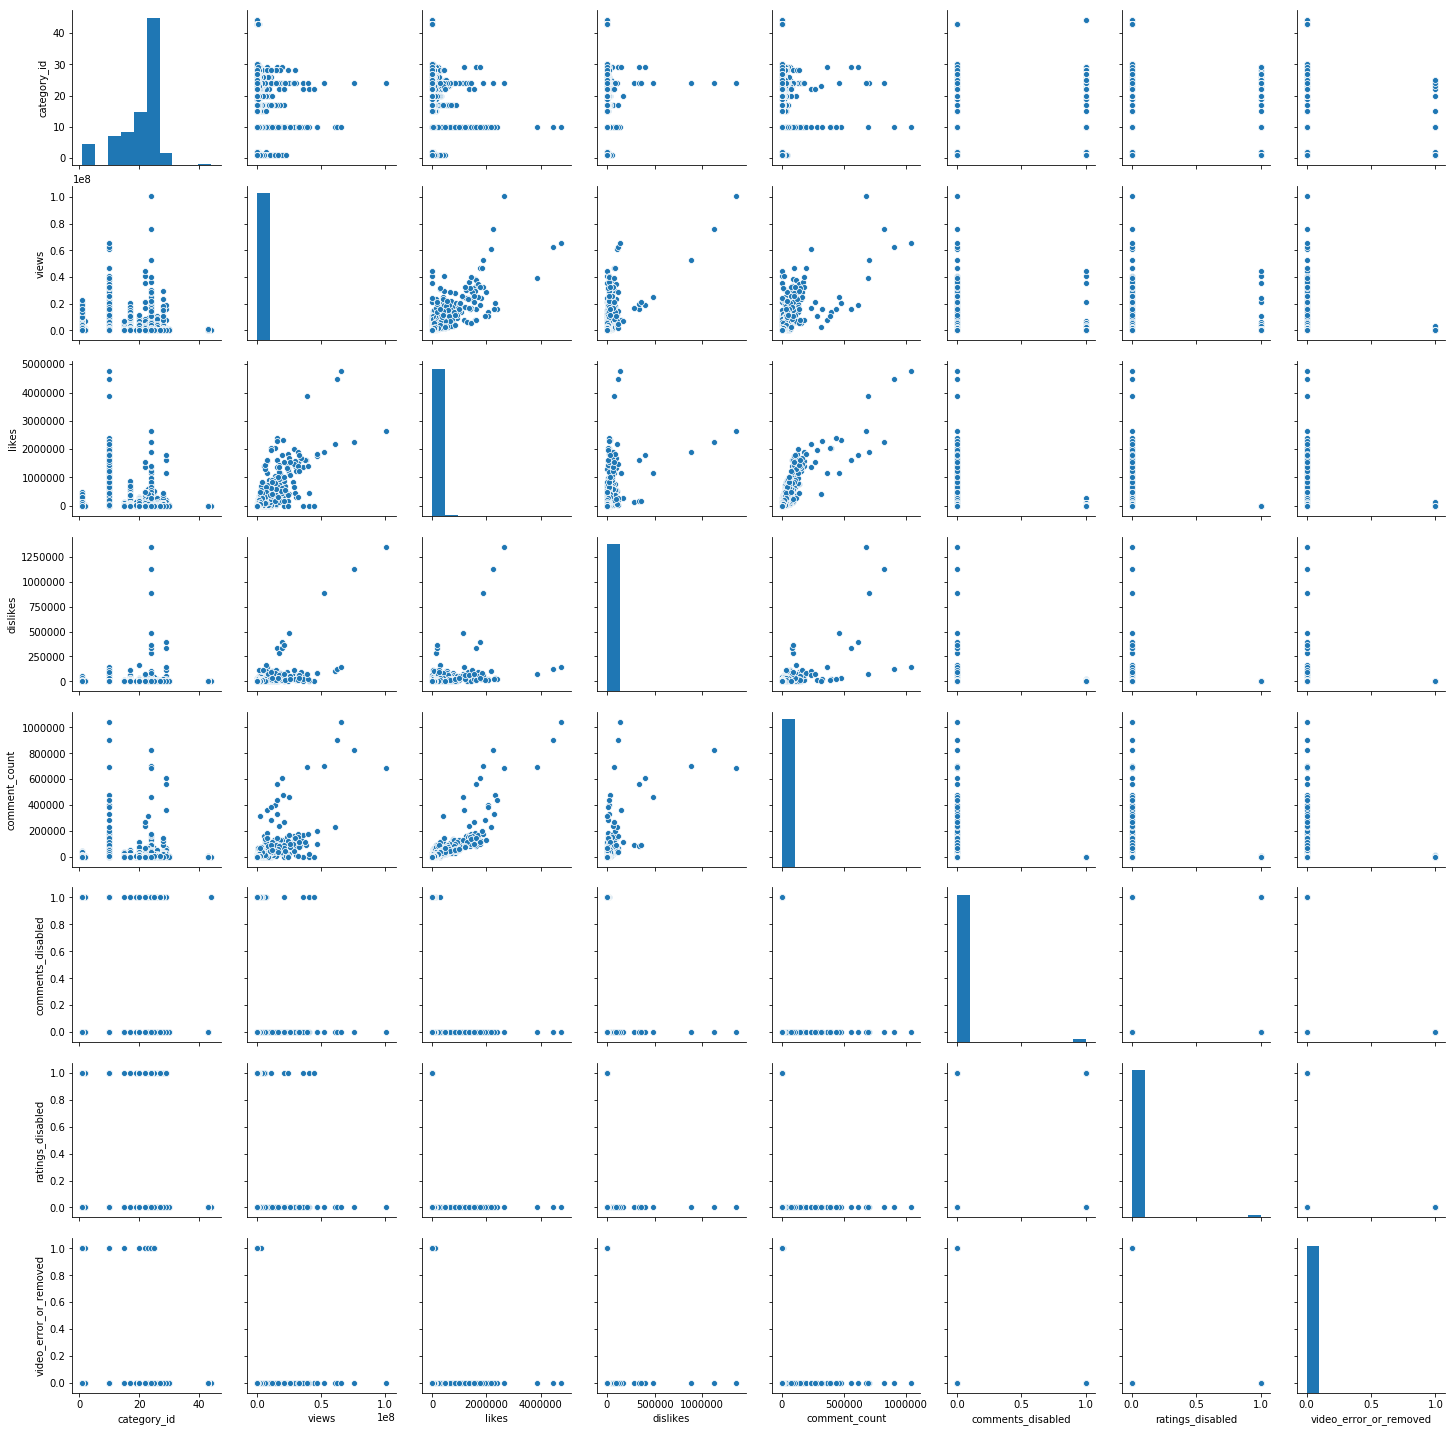

In [59]:
sns.pairplot(fr_data)

In [60]:
gb_data = pd.read_csv('data/GBvideos.csv')
gb_data.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...


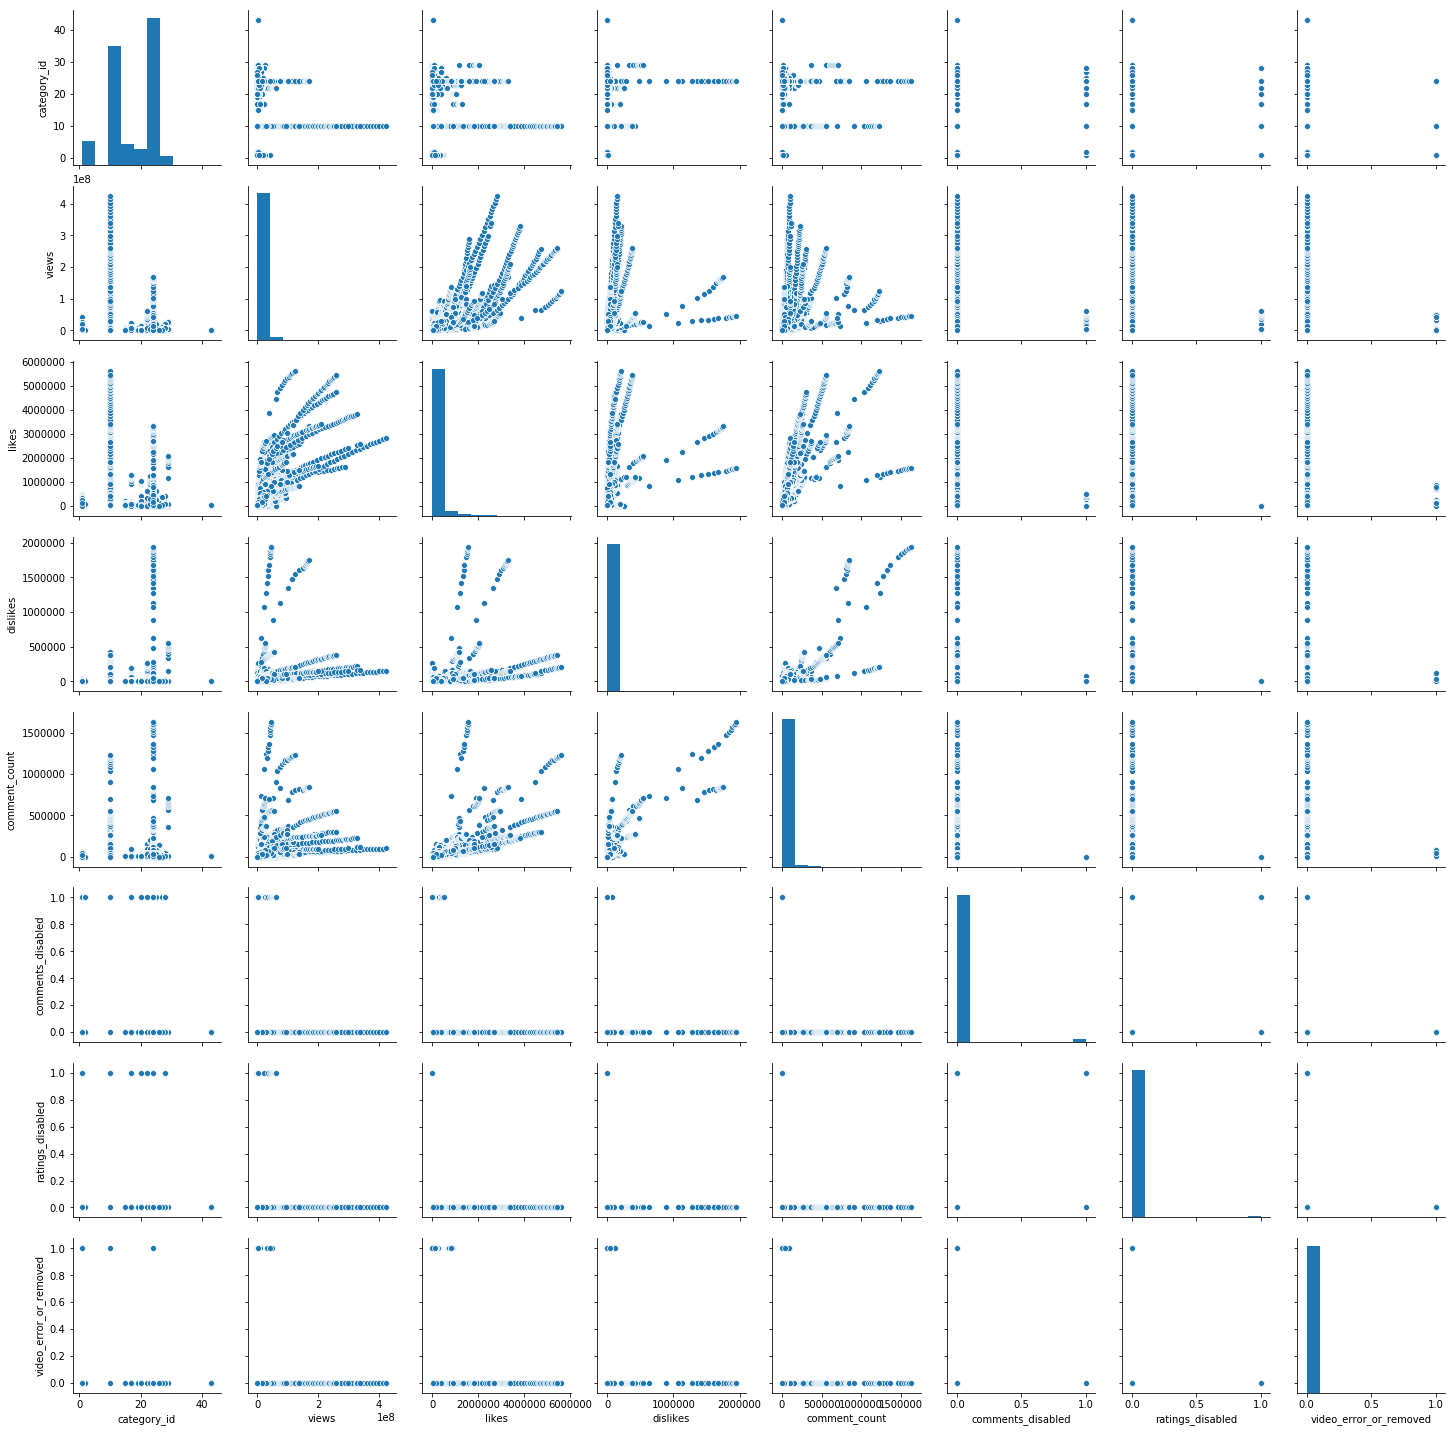

In [61]:
sns.pairplot(gb_data)

In [5]:
sns.__version__

'0.9.0'

The distributions for comment count, number of likes, number of dislikes, and views are all highly skewed to the right. There is a very wide range for all metrics as well; the range for comment count is 0 to 1,361,580, for views it is 549 to 225,211,900, for likes it is 0 to 5,613,827, and for dislikes it is 0 to 1,674,420.

In order to apply a log transformation I added 1 to each number in the data set. Due to the wide ranges for all of the metrics I was confident that it wouldn’t change the overall data set very much. Once a log transformation was applied, all of the histograms appeared to be normally distributed. 

For the pairplots of the US data, the graphs displayed notable correlations for all of the combinations of the following variables - likes, comment count, views, and dislikes. This was shown in all of the other regions, as well.

### Q2. Create a heatmap of correlations between the variables for a region of your choice

>A [heat map (or heatmap)](https://en.wikipedia.org/wiki/Heat_map) is a graphical representation of data where the individual values contained in a matrix are represented as colors.

Seaborn makes it easy to create a heatmap with [`seaborn.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

* Create a correlation matrix for your numeric variables using Pandas with [`DataFrame.corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html). That is, if your dataframe is called `df`, use `df.corr()`.
* Pass in your correlation matrix to `seaborn.heatmap()`, and annotate it with the parameter `annot=True`.
* Are there any interesting correlations? What are they?

In [62]:
gb_corr_mtx = gb_data.corr()
gb_corr_mtx

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.171061,-0.182160,-0.021025,-0.058629,0.032701,-0.056384,-0.007022
views,-0.171061,1.000000,0.795862,0.392407,0.466899,-0.006124,0.013486,0.009810
likes,-0.182160,0.795862,1.000000,0.446746,0.744361,-0.041698,-0.032246,0.008464
dislikes,-0.021025,0.392407,0.446746,1.000000,0.771772,-0.008935,-0.012534,0.011462
comment_count,-0.058629,0.466899,0.744361,0.771772,1.000000,-0.034527,-0.021059,0.003674
comments_disabled,0.032701,-0.006124,-0.041698,-0.008935,-0.034527,1.000000,0.514951,-0.005633
ratings_disabled,-0.056384,0.013486,-0.032246,-0.012534,-0.021059,0.514951,1.000000,-0.003536
video_error_or_removed,-0.007022,0.009810,0.008464,0.011462,0.003674,-0.005633,-0.003536,1.000000


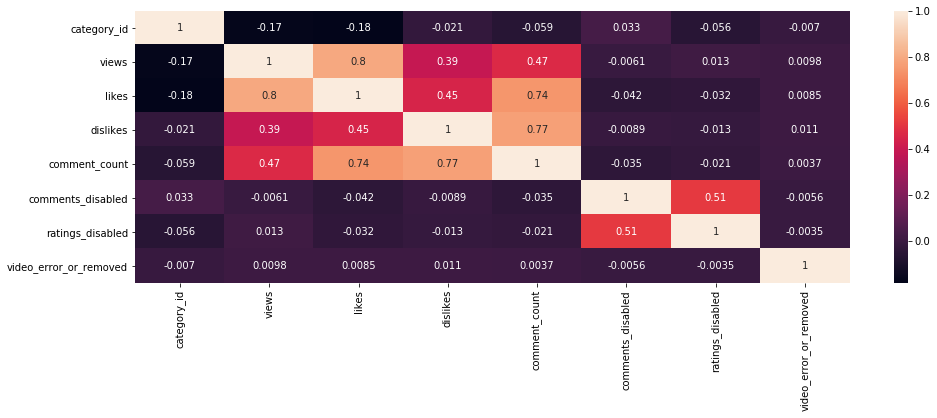

In [63]:
plt.figure(figsize = (16,5))
sns.heatmap(gb_corr_mtx, annot=True)

The highest correlation is between likes and views, at 0.8. After that, the next highest correlation is between dislikes and comment count (0.77), followed by likes and comment count (0.74). It is interesting that dislikes is slightly more correlated with comment count than likes. Having comments disabled and ratings disabled is moderately correlated (0.51). Many of the correlations are very low for the metrics in the data set, such as views and comments disabled (-0.0061) and ratings disabled and views (0.013). The findings from the heat map of correlations support the observations made in the above question. 

### Q3. For 10 points: Create and compare OLS models using variables of your choice, for a region of your choice

* Use `statsmodels` to perform an ANOVA of a variable of your choice as the dependent variable (for example, *views*) and the *video category* as the independent variable. Provide your interpretation of the results.
* Create two different regression models where the dependent variables are the same, and the independent variables are different. What does your interpretation say about the two models?

In [64]:
model = smf.ols('likes ~ C(category_id)', data=fr_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     119.6
Date:                Tue, 09 Oct 2018   Prob (F-statistic):               0.00
Time:                        23:37:35   Log-Likelihood:            -5.2007e+05
No. Observations:               40724   AIC:                         1.040e+06
Df Residuals:                   40706   BIC:                         1.040e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.142e+04   1832.832      6.230      0.000    7826.906     1.5e+04
C(category_id)[T.2]  -9031.8267   3758.445     -2.403      0.016   -1.64e+04   -1665.190
C(category_id)[T.10]  5.886e+04   2279.375     25.822      0.000    5.44e+04    6.33e+04
C(category_id)[T.15] -5784.4903   5825.195     -0.993      0.321   -1.72e+04    5633.021
C(category_id)[T.17] -1293.8794   2242.337     -0.577      0.564   -5688.910    3101.151
C(category_id)[T.19] -4093.4643   8015.585     -0.511      0.610   -1.98e+04    1.16e+04
C(category_id)[T.20]  4004.0787   2885.421      1.388      0.165   -1651.410    9659.567
C(category_id)[T.22] -6361.1209   2150.876     -2.957      0.003   -1.06e+04   -2145.356
C(category_id)[T.23]   1.87e+04   2242.251      8.340      0.000    1.43e+04    2.31e+04
C(category_id)[T.24]   623.0258   2024.160      0.308      0.758   -3344.373    4590.424
C(category_id)[T.25] -8940.2222   2300.108     -3.887      0.000   -1.34e+04   -4431.960
C(category_id)[T.26] -4845.9659   2535.407     -1.911      0.056   -9815.420     123.488
C(category_id)[T.27]  -622.6200   3575.169     -0.174      0.862   -7630.030    6384.790
C(category_id)[T.28]  1.167e+04   3520.528      3.313      0.001    4764.710    1.86e+04
C(category_id)[T.29]   4.11e+04   8180.478      5.024      0.000    2.51e+04    5.71e+04
C(category_id)[T.30] -9210.6599   2.57e+04     -0.358      0.720   -5.96e+04    4.12e+04
C(category_id)[T.43] -8477.7609   8749.324     -0.969      0.333   -2.56e+04    8671.109
C(category_id)[T.44] -1.132e+04   6.02e+04     -0.188      0.851   -1.29e+05    1.07e+05
==============================================================================
Omnibus:                    90491.430   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        851675488.887
Skew:                          20.571   Prob(JB):                         0.00
Kurtosis:                     710.268   Cond. No.                         152.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
model2 = smf.ols('likes ~ comment_count', data=fr_data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                 1.057e+05
Date:                Tue, 09 Oct 2018   Prob (F-statistic):               0.00
Time:                        23:37:39   Log-Likelihood:            -4.9500e+05
No. Observations:               40724   AIC:                         9.900e+05
Df Residuals:                   40722   BIC:                         9.900e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7720.6365    229.820     33.594      0.000    7270.184    8171.089
comment_count     5.2761      0.016    325.127      0.000       5.244       5.308
==============================================================================
Omnibus:                    33147.451   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        286466085.807
Skew:                           2.207   Prob(JB):                         0.00
Kurtosis:                     413.858   Cond. No.                     1.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
model2 = smf.ols('likes ~ dislikes', data=fr_data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                 1.037e+04
Date:                Tue, 09 Oct 2018   Prob (F-statistic):               0.00
Time:                        23:37:45   Log-Likelihood:            -5.1644e+05
No. Observations:               40724   AIC:                         1.033e+06
Df Residuals:                   40722   BIC:                         1.033e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.458e+04    386.778     37.691      0.000    1.38e+04    1.53e+04
dislikes       3.4489      0.034    101.842      0.000       3.382       3.515
==============================================================================
Omnibus:                    87741.713   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        877287848.891
Skew:                          19.006   Prob(JB):                         0.00
Kurtosis:                     721.032   Cond. No.                     1.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There is not a strong, positive correlation between likes and category ID. The r-squared value is 0.048, which indicates that 4.8% of the variance in the distribution of likes can be explained by the category ID. The findings are significant, as the p-value is less than 0.001.

There is a strong, positive correlation between likes and number of comments. The r-squared value is 0.722, which indicates that 77.2% of the variance in the distribution of likes can be explained by the number of comments. The findings are significant, as the p-value is less than 0.001.

There is a weak, positive correlation between likes and number of dislikes. The r-squared value is 0.203, which indicates that 20.3% of the variance in the distribution of likes can be explained by the number of dislikes. The findings are significant, as the p-value is less than 0.001.

These models indicate that likes and number of comments has a stronger correlation than likes and number of dislikes, which makes sense and is supported by the findings above. 

## Part 2: Answer the questions below based on the *[Pokémon dataset](https://www.kaggle.com/abcsds/pokemon)*
- Write Python code that can answer the following questions, and
- Explain your answers in plain English. 

### Q4. For 10 Points: Plot the pairs of different ability points (HP, Attack, Sp. Attack, Defense, etc.).

* Which pairs have the most/least correlation coefficients?

In [67]:
pk_data = pd.read_csv('data/Pokemon.csv')
pk_data.head(2)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False


In [68]:
pk_corr_mtx = pk_data.corr()
pk_corr_mtx

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.119813,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733,0.982516,0.153396
Total,0.119813,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.097614,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102298,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094786,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.088759,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085817,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.010733,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.982516,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.153396,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


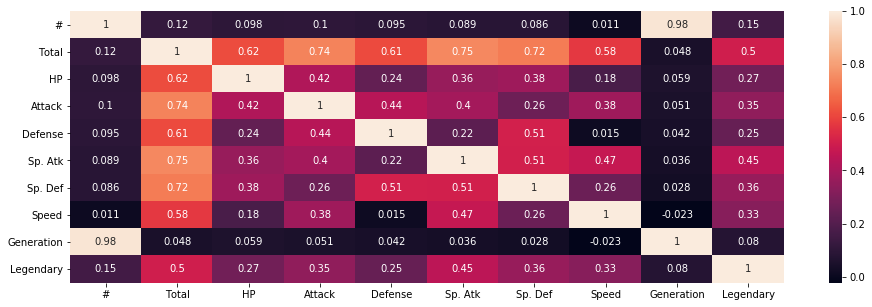

In [69]:
plt.figure(figsize = (16,5))
sns.heatmap(pk_corr_mtx, annot=True)

The highest correlations are with total points, especially with Special Attack (0.75), Attack (0.74), and Special Defense (0.72). This makes sense that the higher correlations are with Total Points because it is a sum of all of the other ability points. Without taking Total Points into account, the highest correlations are between Special Defense and Special Attack (0.51), Special Defense and Defense (0.51), and Special Attack and Speed (0.47). The lowest correlations is between Speed and Defense (0.015).

### Q5. For 10 Points: Plot the distribution of ability points per Pokémon type

* How would you describe each Pokémon type with different ability points?

In [70]:
lst_of_types = []
for x in pk_data['Type 1'].unique():
    lst_of_types.append(x)

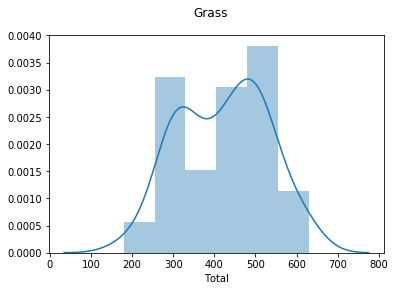

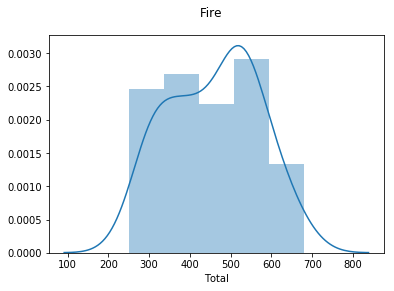

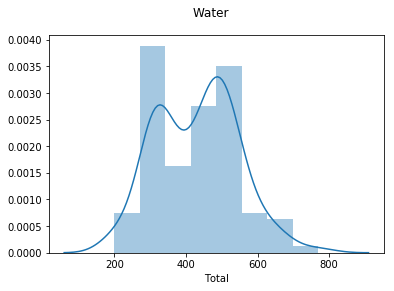

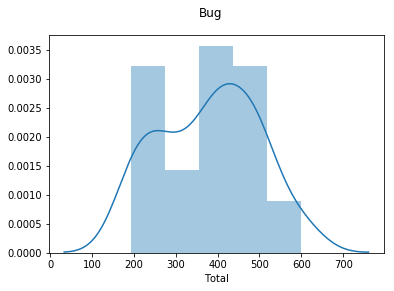

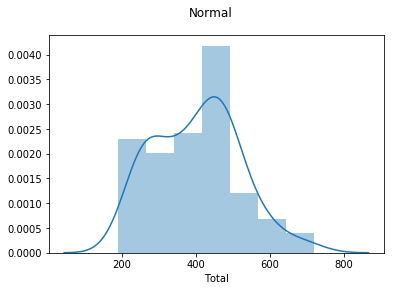

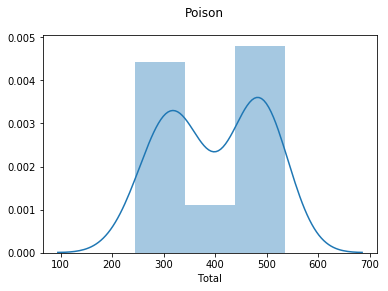

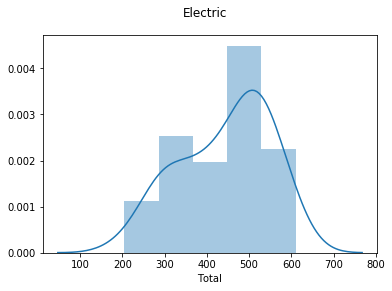

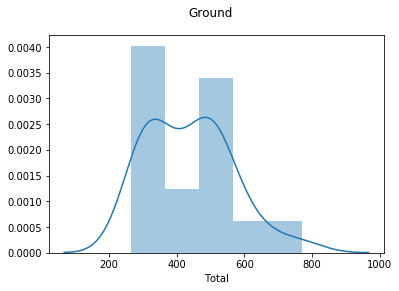

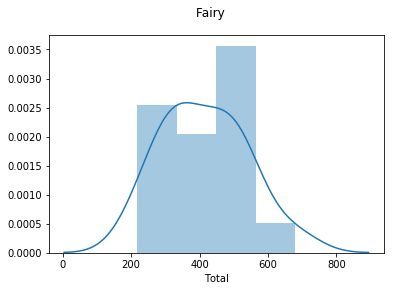

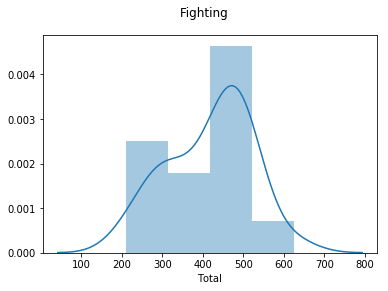

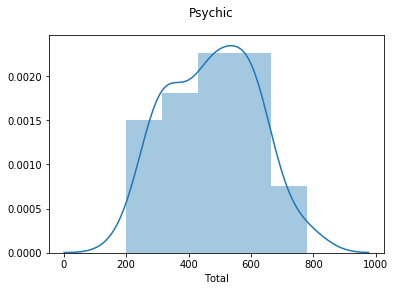

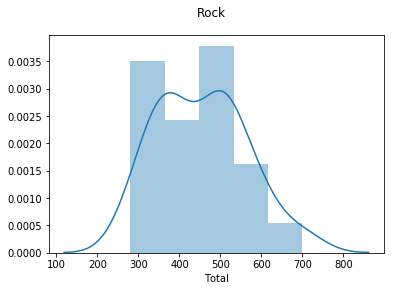

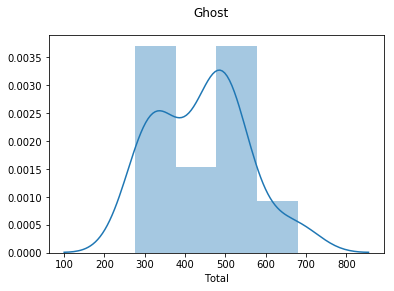

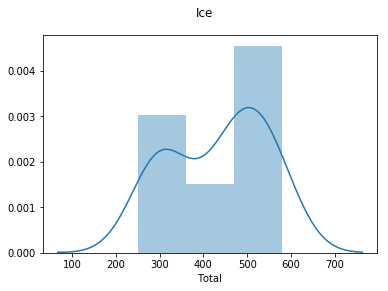

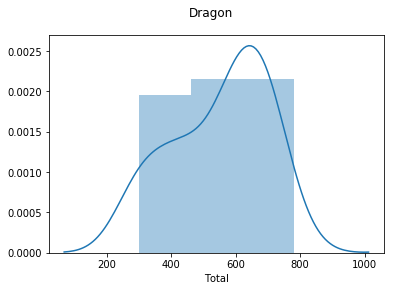

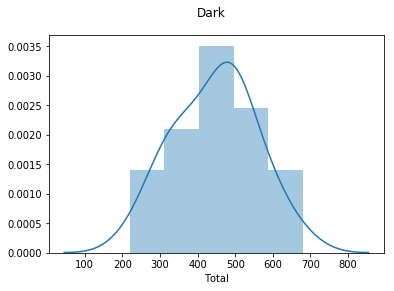

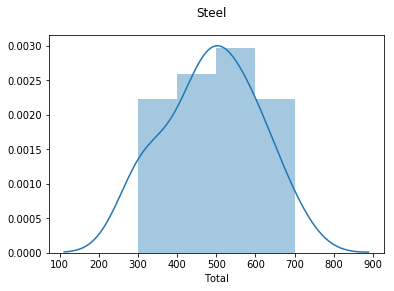

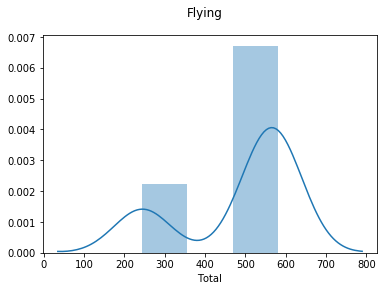

In [71]:
for each_type in lst_of_types:
    type_to_plt = pk_data[pk_data['Type 1'] == each_type]
    plot_type = sns.distplot(type_to_plt.Total)
    plt.suptitle(str(each_type))
    plt.show()

Overall, many of the distributions for the different Pokemon types and their total ability points are bimodal and have a similar range.

The distribution of the different Pokemon types are as follows - 

Grass: bimodal distribution 

Fire: uniform distribution

Water: bimodal distribution

Bug: bimodal distribution

Normal: right skewed

Poison: bimodal distribution

Electric: left skewed

Ground: bimodal distribution

Fairy: slightly skewed to the right

Fighting: left skewed

Psychic: left skewed

Rock: bimodal distribution, skewed right

Ghost: bimodal distribution, skewed right

Ice: bimodal distribution, skewed left

Dragon: uniform distribution

Dark: normal distribution

Steel: normal distribution

Flying: bimodal distribution

### Q6. For 10 Points: How the Pokémon in each generation differ from each other?

* Do you think designers of *Pokémon* tried to address different distributions of ability points in each generation?

In [72]:
lst_of_gen = []
for thing in pk_data['Generation'].unique():
    lst_of_gen.append(thing)
lst_of_gen

[1, 2, 3, 4, 5, 6]

count    166.000000
mean     426.813253
std      115.878076
min      195.000000
25%      325.000000
50%      436.500000
75%      500.000000
max      780.000000
Name: Total, dtype: float64


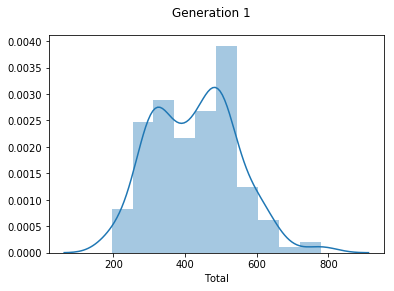

count    106.000000
mean     418.283019
std      120.114133
min      180.000000
25%      330.000000
50%      422.500000
75%      500.000000
max      700.000000
Name: Total, dtype: float64


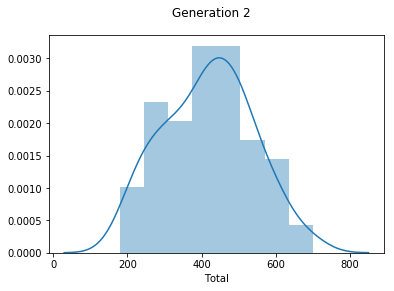

count    160.000000
mean     436.225000
std      136.314193
min      190.000000
25%      310.000000
50%      435.000000
75%      530.000000
max      780.000000
Name: Total, dtype: float64


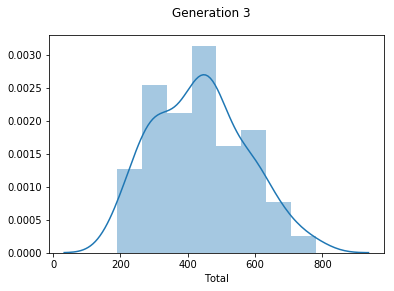

count    121.000000
mean     459.016529
std      119.556541
min      194.000000
25%      350.000000
50%      485.000000
75%      530.000000
max      720.000000
Name: Total, dtype: float64


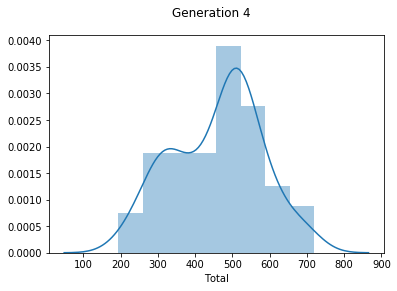

count    165.000000
mean     434.987879
std      108.117934
min      255.000000
25%      328.000000
50%      465.000000
75%      505.000000
max      700.000000
Name: Total, dtype: float64


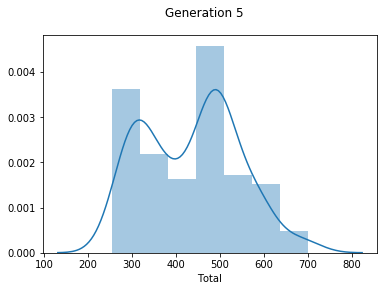

count     82.000000
mean     436.378049
std      114.952340
min      200.000000
25%      335.000000
50%      464.000000
75%      512.250000
max      700.000000
Name: Total, dtype: float64


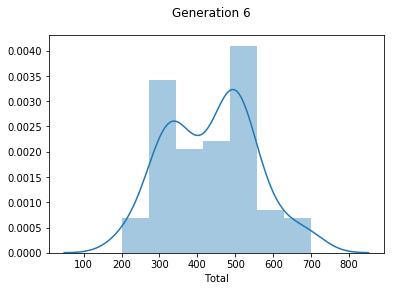

In [73]:
for each_gen in lst_of_gen:
    gen_to_plt = pk_data[pk_data['Generation'] == each_gen]
    plot_gen = sns.distplot(gen_to_plt.Total)
    print(gen_to_plt['Total'].describe())
    plt.suptitle('Generation ' + str(each_gen))
    plt.show()

The distributions for the different generations are as follows -

Generation 1 - bimodal and skewed slightly to the left. The minimum number of total ability points is 195, and the maximum number of total ability points is 780.

Generation 2 - normally distributed. The minimum number of total ability points is 180, and the maximum number of total ability points is 700.

Generation 3 - normally distributed. The minimum number of total ability points is 190, and the maximum number of total ability points is 780.

Generation 4 - unimodal and skewed slightly to the left. The minimum number of total ability points is 194, and the maximum number of total ability points is 720.

Generation 5 - bimodal and skewed slightly to the right. The minimum number of total ability points is 244, and the maximum number of total ability points is 700.

Generation 6 - bimodal and skewed slightly to the left. The minimum number of total ability points is 200, and the maximum number of total ability points is 700.

I do not think the Pokemon designers tried to address different distributions of ability points in the different generations, but I do think that they took into account the minimum and maximum numbers and stayed mostly consistent with these values. 

### Q7. *Bonus* – For 5 Points: Which ability points were significantly different per Pokémon type?

In [74]:
model_pk = smf.ols("Total ~ Q('Type 1')", data=pk_data).fit()
model_pk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     4.639
Date:                Tue, 09 Oct 2018   Prob (F-statistic):           2.08e-09
Time:                        23:41:41   Log-Likelihood:                -4926.0
No. Observations:                 800   AIC:                             9888.
Df Residuals:                     782   BIC:                             9972.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 378.9275     13.913     27.235      0.000     351.616     406.239
Q('Type 1')[T.Dark]        66.8144     24.989      2.674      0.008      17.761     115.868
Q('Type 1')[T.Dragon]     171.6037     24.718      6.942      0.000     123.082     220.125
Q('Type 1')[T.Electric]    64.4816     22.297      2.892      0.004      20.713     108.250
Q('Type 1')[T.Fairy]       34.2489     31.294      1.094      0.274     -27.180      95.678
Q('Type 1')[T.Fighting]    37.5169     26.235      1.430      0.153     -13.983      89.017
Q('Type 1')[T.Fire]        79.1494     21.224      3.729      0.000      37.487     120.812
Q('Type 1')[T.Flying]     106.0725     59.438      1.785      0.075     -10.604     222.749
Q('Type 1')[T.Ghost]       60.6350     24.718      2.453      0.014      12.113     109.157
Q('Type 1')[T.Grass]       42.2153     19.606      2.153      0.032       3.729      80.702
Q('Type 1')[T.Ground]      58.5725     24.718      2.370      0.018      10.051     107.094
Q('Type 1')[T.Ice]         54.5308     27.388      1.991      0.047       0.767     108.294
Q('Type 1')[T.Normal]      22.7561     18.162      1.253      0.211     -12.897      58.409
Q('Type 1')[T.Poison]      20.2153     25.896      0.781      0.435     -30.619      71.050
Q('Type 1')[T.Psychic]     97.0198     20.686      4.690      0.000      56.413     137.627
Q('Type 1')[T.Rock]        74.8225     22.297      3.356      0.001      31.054     118.591
Q('Type 1')[T.Steel]      108.7762     26.235      4.146      0.000      57.276     160.276
Q('Type 1')[T.Water]       51.5278     17.687      2.913      0.004      16.808      86.248
==============================================================================
Omnibus:                       26.468   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.701
Skew:                           0.032   Prob(JB):                      0.00175
Kurtosis:                       2.386   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The ability points were significantly different for the Dark, Dragon, Electric, Fire, Ghost, Grass, Ground, Ice, Psychic, Rock, Steel, and Water types. 